#**`Build a Logistic Regression Model on the Adult Income Dataset`**

##**1. Preprocess**
##**2. Train**
##**3. Evaluate**

#**Preprocess**
 Load and Prepare the Dataset
* Load the dataset into a Pandas DataFrame.
* Replace " ?" with proper NaN values.
* Perform preprocessing steps:
  * Handle missing values.
  * Handle outliers (if needed).
  * Encode categorical variables (use either get_dummies or OneHotEncoder).
  * Scale numerical features.
* Now drop irrelevant features if necessary.

In [59]:
# Load dataset into pandas DataFrame

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
    header=None,
    names=["age", "workclass", "fnlwgt", "education", "education-num",
           "marital-status", "occupation", "relationship", "race", "sex",
           "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"],
    na_values=" ?", sep=",", engine="python"
)
df.shape

(32561, 15)

In [35]:
# Display first rows
df = pd.DataFrame(df)
df.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


**Step 1. Handling Missing Values**

Identify which columns contain missing values.
Decide: should you drop rows/columns, or impute (fill in) the values?

In [37]:
# Checking for missing data

df.isnull().sum()

,0
age,0
workclass,1836
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,1843
relationship,0
race,0
sex,0


In [38]:
# Handling missing data
# I decided to replace null value with mode because they are categorical data

df.loc[:, ["workclass","occupation","native-country"]] = df[["workclass","occupation","native-country"]].fillna(df[["workclass","occupation","native-country"]].mode().iloc[0]) # Replace missing values with mode
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


**Step 2. Handling Outliers**

* Use summary statistics and visualizations (e.g., histograms, boxplots) to detect extreme values.
* Apply the IQR method or another method to set thresholds.
Decide: remove, cap, or transform outliers

In [39]:
# Handling outliers
# summary statistics to detect extreme values

df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


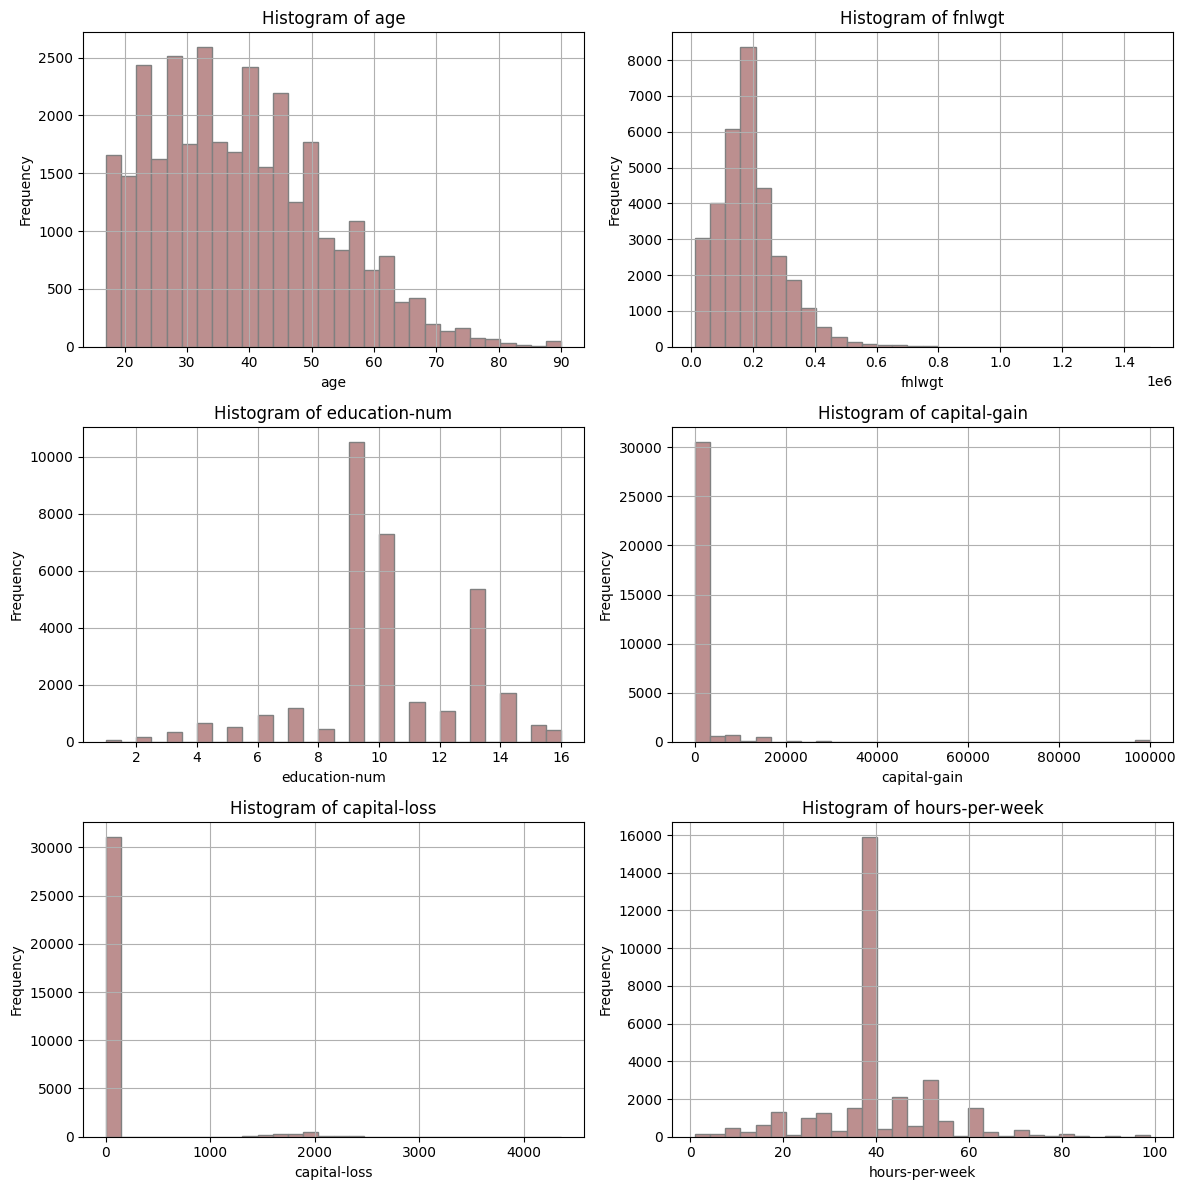

In [40]:
# visualization - histogram to detect outliers with extreme values

numerical_cols = df.select_dtypes(include='number').columns

# Number of plots
n = len(numerical_cols)

# Define grid size
cols = 2
rows = n // cols + (n % cols > 0)  # Round up

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 4 * rows))

# Flatten axes for easy indexing
axes = axes.flatten()

# Loop through each index and plot
for i in range(n):
    col = numerical_cols[i]
    axes[i].hist(df[col].dropna(), bins=30, color='rosybrown', edgecolor='grey')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

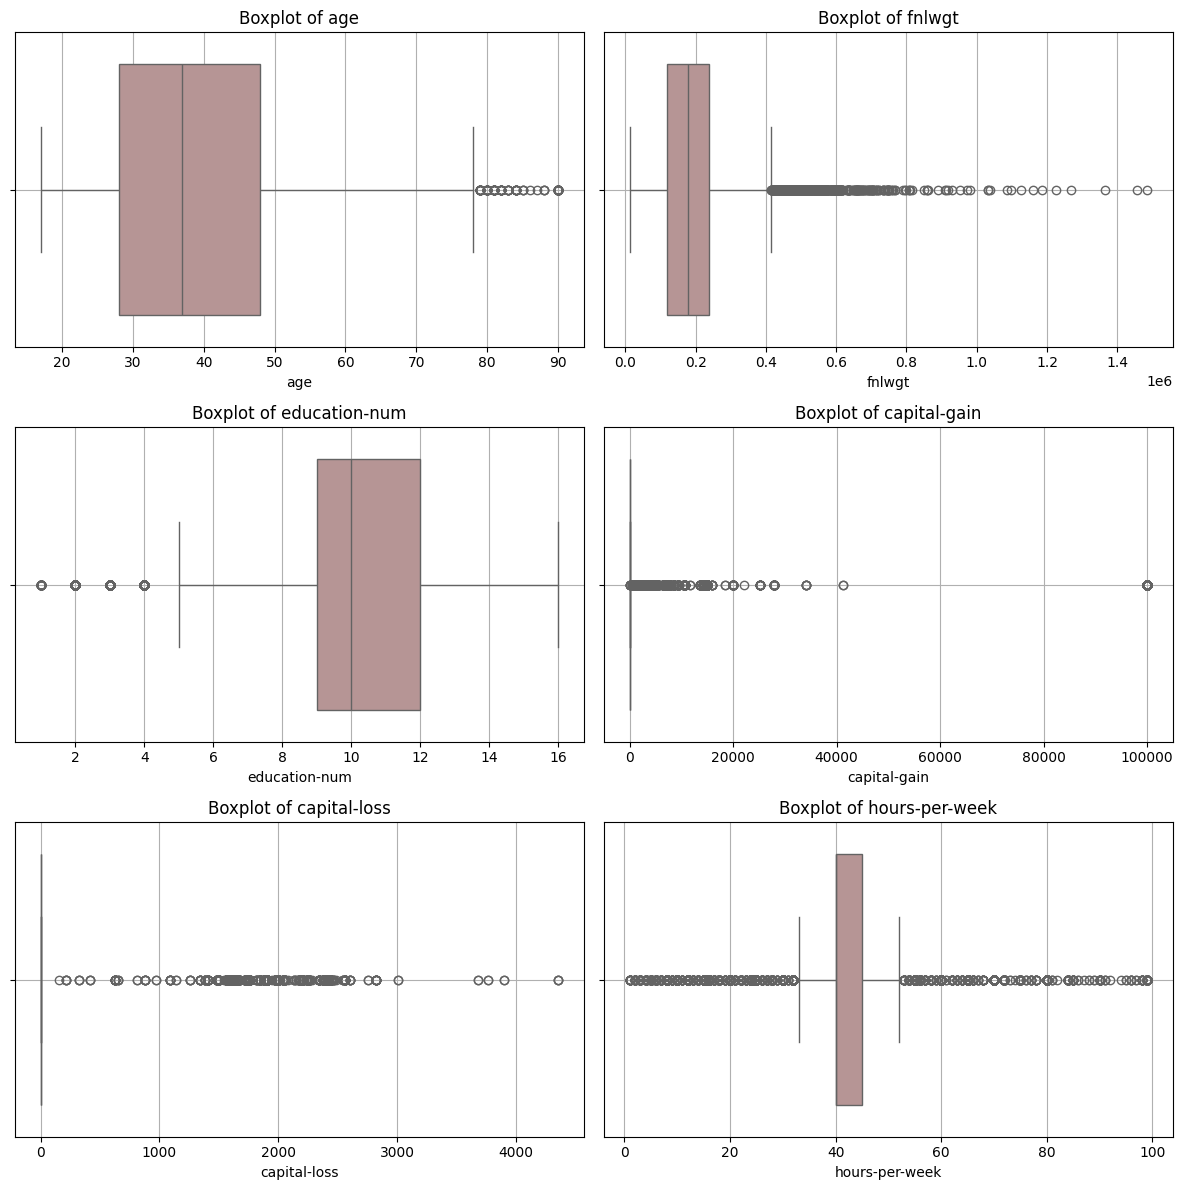

In [41]:
# extra visualization - boxplot to detect outliers with extreme values

n = len(numerical_cols) # to get number of plots

# Define grid size
cols = 2
rows = n // cols + (n % cols > 0)  # Round up

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 4 * rows))

# Flatten axes for easy indexing
axes = axes.flatten()

# Loop through each index and plot
for i in range(n):
    col = numerical_cols[i]
    sns.boxplot(x=df[col], ax=axes[i], color='rosybrown')
    axes[i].set_xlabel(col)
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

In [42]:
# apply the IQR method or another method to set thresholds. Decide: remove, cap, or transform outliers

# Select numerical columns
numerical_cols = df.select_dtypes(include='number').columns

# Store bounds
bounds = {}

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    bounds[col] = (lower, upper)

In [62]:
# Cap outliers

for col in ['hours-per-week', 'capital-gain', 'capital-loss','fnlwgt', 'age']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)

# Transform skewed columns

for col in ['capital-gain', 'capital-loss']:
    df[col] = np.log1p(df[col])


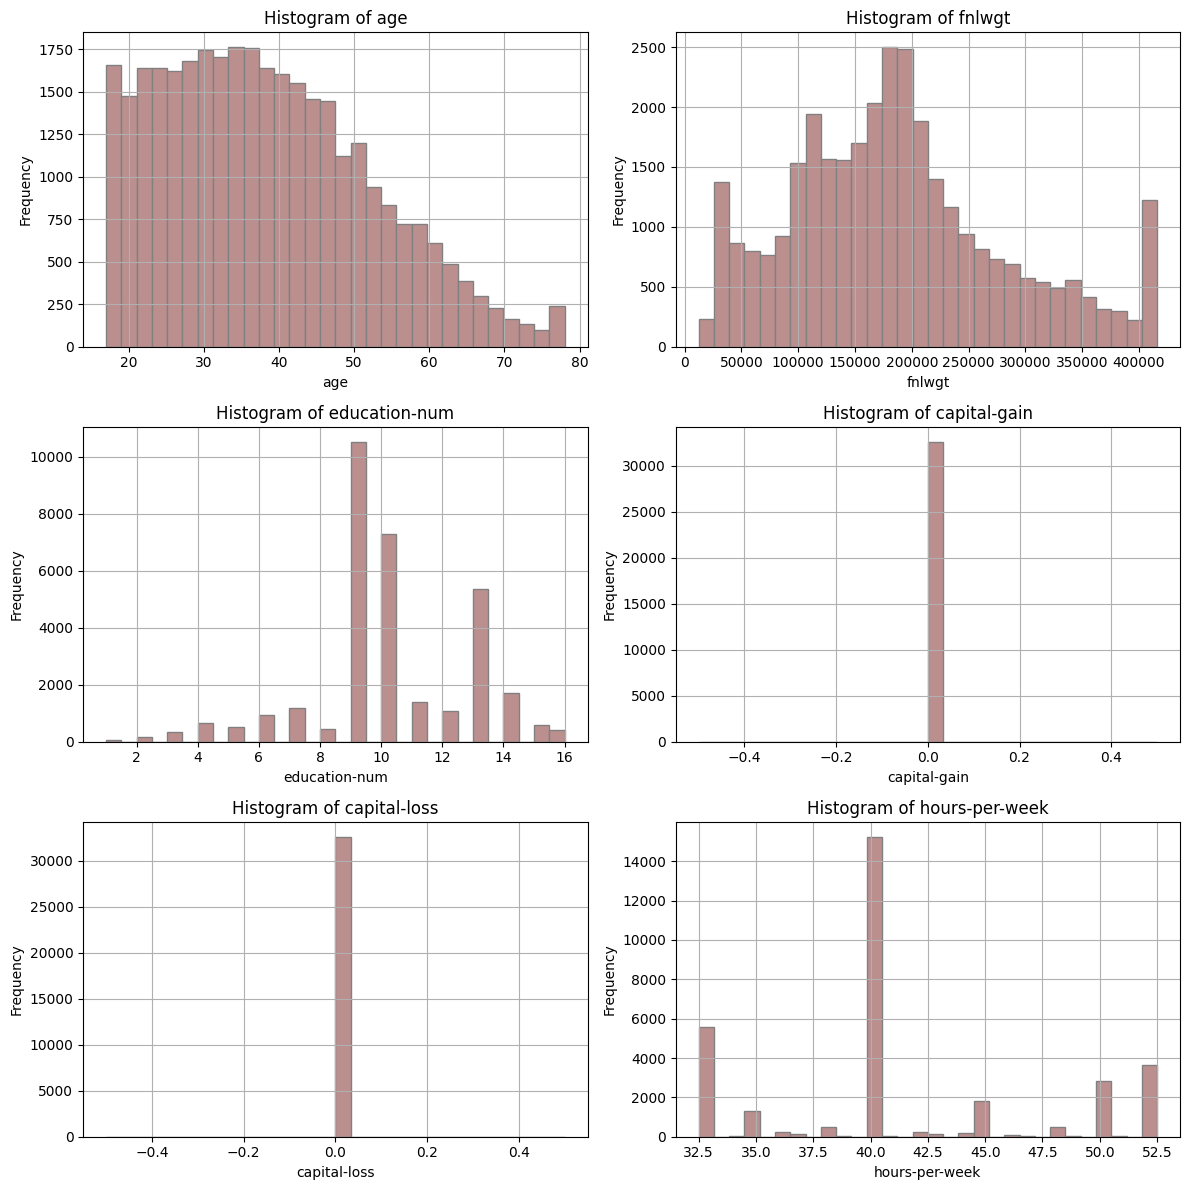

In [44]:
# After capping

numerical_cols = df.select_dtypes(include='number').columns

# Number of plots
n = len(numerical_cols)

# Define grid size
cols = 2
rows = n // cols + (n % cols > 0)  # Round up

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 4 * rows))

# Flatten axes for easy indexing
axes = axes.flatten()

# Loop through each index and plot
for i in range(n):
    col = numerical_cols[i]
    axes[i].hist(df[col].dropna(), bins=30, color='rosybrown', edgecolor='grey')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

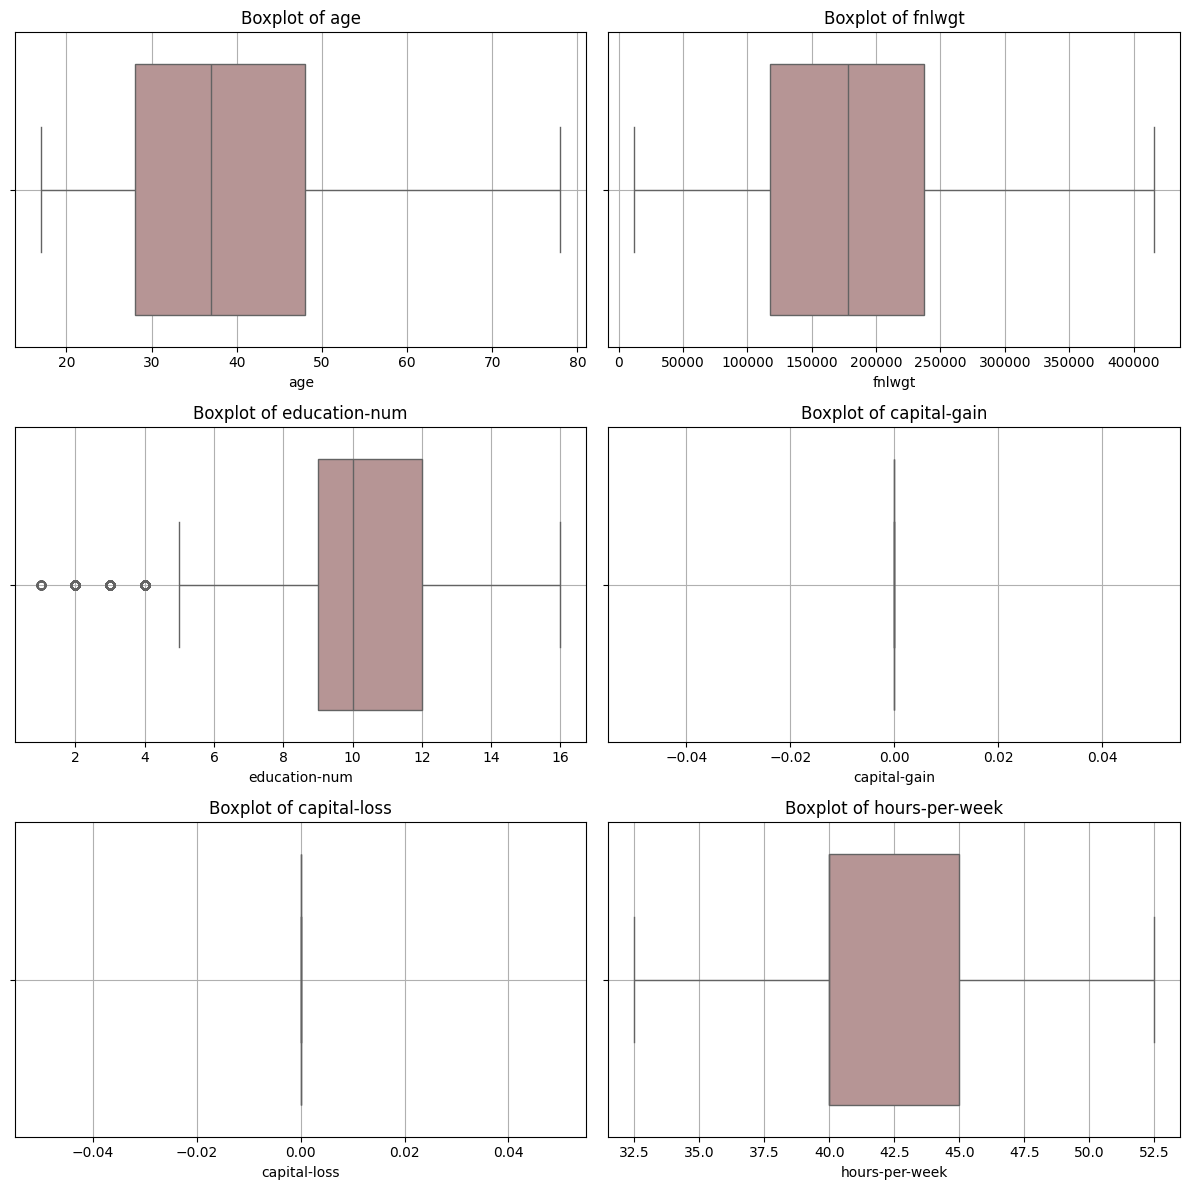

In [45]:
numerical_cols = df.select_dtypes(include='number').columns

# Number of plots
n = len(numerical_cols)

# Define grid size
cols = 2
rows = n // cols + (n % cols > 0)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 4 * rows))

# Flatten axes for easy indexing
axes = axes.flatten()

# Loop through each index and plot
for i in range(n):
    col = numerical_cols[i]
    sns.boxplot(x=df[col], ax=axes[i], color='rosybrown')
    axes[i].set_xlabel(col)
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

**Step 3. Handling Categorical Data**

* Find all the categorical features in the dataset.
* Convert them into numeric form so they can be used in models.
* Try both pd.get_dummies() and OneHotEncoder.
* Reflect: which method would you use in production, and why?

In [46]:
# find all categorical features in the dataset

categorical_features = ["workclass","education","marital-status","occupation","relationship","race","sex","native-country"]
print("Categorical features:")
for feature in categorical_features:
    print(f"- {feature}")

Categorical features:
- workclass
- education
- marital-status
- occupation
- relationship
- race
- sex
- native-country


In [47]:
# Convert them into numeric form so they can be used in models
# pd.get_dummies()

df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)
df_encoded.head(10)





,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,0.0,0.0,40.0,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,0.0,0.0,32.5,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,0.0,0.0,40.0,<=50K,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,0.0,0.0,40.0,<=50K,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0.0,0.0,40.0,<=50K,False,False,True,...,False,False,False,False,False,False,False,False,False,False
5,37,284582,14,0.0,0.0,40.0,<=50K,False,False,True,...,False,False,False,False,False,False,False,True,False,False
6,49,160187,5,0.0,0.0,32.5,<=50K,False,False,True,...,False,False,False,False,False,False,False,False,False,False
7,52,209642,9,0.0,0.0,45.0,>50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
8,31,45781,14,0.0,0.0,50.0,>50K,False,False,True,...,False,False,False,False,False,False,False,True,False,False
9,42,159449,13,0.0,0.0,40.0,>50K,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [48]:
# Initialize encoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform
encoded_array = encoder.fit_transform(df[categorical_features])

# Convert to DataFrame
df_encoded = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_features))

# Combine with original dataset (excluding original categorical columns)
df_final = pd.concat([df.drop(columns=categorical_features), df_encoded], axis=1)

# Preview
print(df_final.head())

   age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   39   77516             13           0.0           0.0            40.0   
1   50   83311             13           0.0           0.0            32.5   
2   38  215646              9           0.0           0.0            40.0   
3   53  234721              7           0.0           0.0            40.0   
4   28  338409             13           0.0           0.0            40.0   

   income  workclass_ Local-gov  workclass_ Never-worked  workclass_ Private  \
0   <=50K                   0.0                      0.0                 0.0   
1   <=50K                   0.0                      0.0                 0.0   
2   <=50K                   0.0                      0.0                 1.0   
3   <=50K                   0.0                      0.0                 1.0   
4   <=50K                   0.0                      0.0                 1.0   

   ...  native-country_ Portugal  native-country_ Puerto

Reflect: which method would you use in production, and why?

OneHotEncoder is preferred in production because it integrates with pipelines, handles unseen categories safely, and offers better scalability and memory efficiency than get_dummies





**Step 4. Feature Scaling**

* Pick several numeric features.
* Apply different scaling methods (Min-Max, Standardization).
* Compare before and after.
* Which method do you think is most appropriate here?

In [49]:
# Select numeric columns
numeric_cols = ['age', 'hours-per-week',  'capital-gain', 'capital-loss']
X_numeric = df_final[numeric_cols]

# Min-Max Scaling
minmax = MinMaxScaler()
X_minmax = pd.DataFrame(minmax.fit_transform(X_numeric), columns=[col + '_minmax' for col in numeric_cols])

# Standardization (Z-score)
standard = StandardScaler()
X_standard = pd.DataFrame(standard.fit_transform(X_numeric), columns=[col + '_zscore' for col in numeric_cols])

# Combine for comparison
scaled_df = pd.concat([X_numeric, X_minmax, X_standard], axis=1)
scaled_df.head()

,age,hours-per-week,capital-gain,capital-loss,age_minmax,hours-per-week_minmax,capital-gain_minmax,capital-loss_minmax,age_zscore,hours-per-week_zscore,capital-gain_zscore,capital-loss_zscore
0,39,40.0,0.0,0.0,0.360656,0.375,0.0,0.0,0.032782,-0.194354,0.0,0.0
1,50,32.5,0.0,0.0,0.540984,0.000,0.0,0.0,0.844236,-1.406591,0.0,0.0
2,38,40.0,0.0,0.0,0.344262,0.375,0.0,0.0,-0.040986,-0.194354,0.0,0.0
3,53,40.0,0.0,0.0,0.590164,0.375,0.0,0.0,1.065541,-0.194354,0.0,0.0
4,28,40.0,0.0,0.0,0.180328,0.375,0.0,0.0,-0.778671,-0.194354,0.0,0.0


Which method do you think is most appropriate here?

Z-score standardization would be a better choice here because it creates a more consistent and model-ready dataset by centering features and scaling them based on their variability—ideal when the data spans different ranges or units, like in this dataset

**Step 5. Feature Engineering**
* Create at least two new features that could help predict income.
* Think about combinations, transformations, or new groupings of existing variables.
* Explain your reasoning: why might these new features help?

In [50]:
# Create is_married_and_working column

df_final['is_married_and_working'] = (
    ((df['marital-status'].str.contains('Married')) &
     (df['workclass'].isin(['Private', 'Self-emp-not-inc', 'Self-emp-inc'])))
    .astype(int)
)

Why this new feature might help with income prediction

Individuals who are married and actively working in the private or self-employed sector may have more financial stability or dual-income households, which could correlate with higher income.

In [51]:
df_final['has_advanced_education'] = df['education'].isin([
    'Bachelors', 'Masters', 'Doctorate', 'Prof-school'
]).astype(int)

Why this new feature might help with income prediction

Advanced education (e.g., Bachelors, Masters, Doctorate) often qualify individuals for skilled, managerial, or professional roles which offer higher salaries and more career growth.

In [52]:
df_final.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,is_married_and_working,has_advanced_education
0,39,77516,13,0.0,0.0,40.0,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0
1,50,83311,13,0.0,0.0,32.5,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0
2,38,215646,9,0.0,0.0,40.0,<=50K,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0
3,53,234721,7,0.0,0.0,40.0,<=50K,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0
4,28,338409,13,0.0,0.0,40.0,<=50K,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


#**Define Features and Target Columns**


Features = all useful columns (both numeric and categorical, after encoding).
Target = income column (binary: <=50K = 0, >50K = 1).

In [53]:
X = df_final.drop('income', axis=1)
y = df_final['income']

# Convert target variable to numerical labels
y = y.apply(lambda x: 1 if x == ' >50K' else 0)

In [54]:
print(X.shape)
print(y.shape)

(32561, 99)
(32561,)


#**Train**


Train-Test Split

* Split the dataset into training and test sets (80/20).
* Make sure both sets have the same feature space.

Train the Model

* Use Logistic Regression as your first supervised learning model.
* Fit the model on the training set.

 Make Predictions

* Predict labels (0/1) for the test set.
* Also predict probabilities with .predict_proba()

In [55]:
# Split dataset into training and test sets(80/20)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=30, stratify=y)


In [56]:
# Use Logistic Regression and fit the model

model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [57]:
# Predict labels(0,1) for test set
y_pred = model.predict(X_test)
print("Predicted labels (0 or 1):")
print(y_pred[:10])

# Predict probabilities
y_proba = model.predict_proba(X_test)[:, 1]  # Probability of class 1 (>50K)
print("\nPredicted probabilities for class 1 (>50K):")
print(y_proba[:10])

Predicted labels (0 or 1):
[0 1 1 0 0 0 0 1 0 1]

Predicted probabilities for class 1 (>50K):
[0.09319098 0.68274763 0.56717988 0.02940228 0.02501999 0.0162669
 0.05479552 0.76402293 0.17145798 0.60433834]


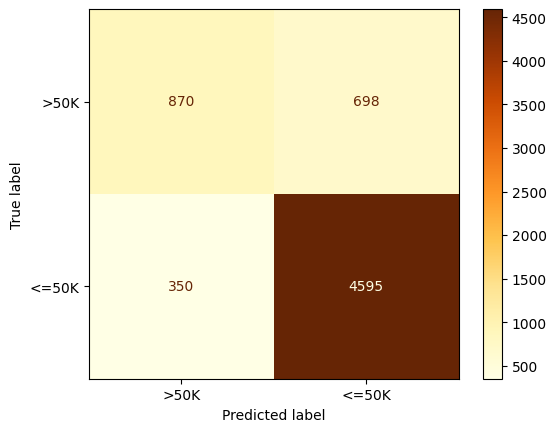

In [60]:
cm = confusion_matrix(y_test, y_pred, labels=[1,0])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[">50K","<=50K"])
disp.plot(cmap='YlOrBr')
plt.show()

**Interpretation:**

True Negatives (4595): The model correctly predicted that 4595 individuals earn ≤50K.

True Positives (870): It correctly identified 870 individuals earning >50K.

False Positives (350): These were predicted as >50K but actually earn ≤50K.

False Negatives (698): These were predicted as ≤50K but actually earn >50K.

* The model is very good at identifying low-income individuals (high TN).

* It’s reasonably good at identifying high-income individuals, but it misses quite a few (698 FN vs 870 TP).

* False positives (350) are lower than false negatives, which is good if we want to avoid overestimating income

#**Evaluate**

Evaluate the Model

For now, calculate only the accuracy score on the test set.

Print:
Accuracy (as a percentage).
A small sample of predictions vs actuals (head of a DataFrame)

In [61]:
# 1. Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy:" + str(round(accuracy * 100, 2)) + "%")

# 2. Show sample predictions vs actuals
sample_df = pd.DataFrame({
    'Actual': y_test.values[:10],
    'Predicted': y_pred[:10]
})
print(sample_df)

Accuracy:83.91%
   Actual  Predicted
0       0          0
1       1          1
2       0          1
3       0          0
4       0          0
5       0          0
6       0          0
7       1          1
8       1          0
9       1          1


**Key Takeaway**

The Logistic Regression model achieved **83.91%** accuracy, which means:

Out of every 100 individuals in the test set, about 84 were correctly classified as either earning <=50K or >50K.


`Challenge`: Once you get accuracy, think about this: If the dataset is imbalanced (e.g., far more people earning <=50K), is accuracy alone enough to judge performance?

Because Accuracy treats all predictions equally,it can overstate performance by favoring the majority class.It can also understate performance when your model excels at the minority class.
It’s essential to go beyond accuracy — especially in imbalanced datasets


